### inverse sampling

- ***sampling*** refers to the process of drawing samples from a data distribution
- *inverse sampling* is a method to draw samples from a cumulative distribution function (cdf)
- cdf(x) = probabilitat acomulada
- cdf^-1(p.acom) = x &rarr; ho fem al revés.
- permet fer un numero aleatori i saber quin valor és.
- la magia està en que si treiem 100 valors, aquests seguiran la distribució inicial.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme() # Setting seaborn style

In [2]:
iris = sns.load_dataset("iris")

#### cdf function

In [3]:
from sklearn.neighbors import KernelDensity

In [4]:
def mycdf(data, kernel = 'gaussian', bandwidth = 0.2, bin_width = 0.2):
    kde = KernelDensity(kernel = 'gaussian', bandwidth = bandwidth).fit(np.array(data)[:, None])
    bins = np.round(np.arange(data.min() -0.4, data.max() +0.4, step = bin_width), 2)
    pdf = np.exp(kde.score_samples(bins[:, None]))
    cdf = np.cumsum(pdf *bin_width)
    return bins, pdf, cdf

#### inverse sampling

In [5]:
# compute the cdf
kernel, bandwidth, bin_width = 'gaussian', 0.2, 0.2
bins, pdf, cdf = mycdf(iris.petal_length, kernel = kernel, bandwidth = bandwidth, bin_width = bin_width)

In [6]:
# draw values from the distribution
my_petalLength = []
# Si en posem més de 150, el resultat s'assemblarà més a la mostra.
for p in np.random.rand(150):
    # Tots els  valors de x que són més petits (que estan dins el rang) - dins la probabilitat asociada
    # where retorna els que una tupla de arrays (compleixen i els seus index)
    low = np.where(cdf <= p)[0]
    # Agafem el valor més gran perquè és el que li toca
    idx = low[-1] if len(low) > 1 else low.item()
    my_petalLength.append(bins[idx])
my_petalLength[:10]

[5.2, 4.2, 5.4, 2.4, 4.4, 1.2, 5.6, 4.4, 5.2, 1.4]

#### show sampled values distribution

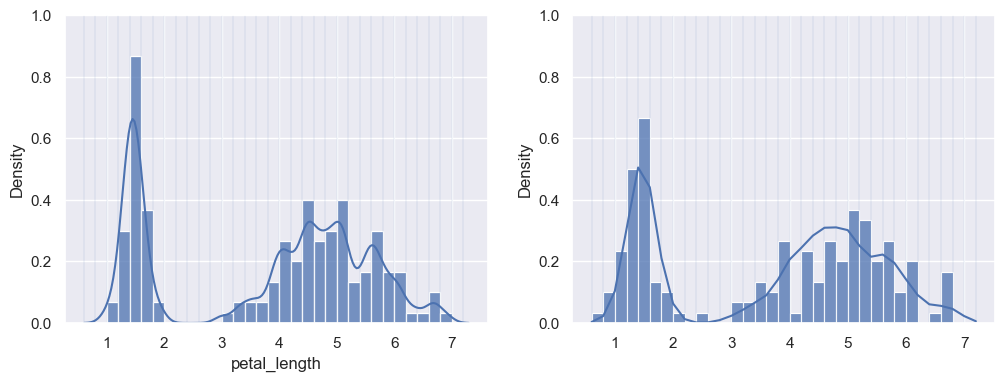

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
# original data distribution
sns.histplot(ax = axs[0], data = iris, x = "petal_length", binwidth = bin_width, stat = 'density')
sns.kdeplot(ax = axs[0], data = iris,  x = 'petal_length', bw_adjust = bin_width);
axs[0].set_ylim((0, 1))
# sampled data distribujtion
# sns.histplot(ax = axs[1], x = my_petalLength, binwidth = bin_width, stat = 'density')
# El binning és diferent, perquè ho fa el seaborn automaticament 'binwidth' -> les dades són diferents
sns.histplot(ax = axs[1], x = my_petalLength, bins = bins, stat = 'density')

sns.lineplot(ax = axs[1], x = bins, y = pdf)
axs[1].set_ylim((0, 1));
for b in bins: axs[0].axvline(b, linewidth = 0.1)
for b in bins: axs[1].axvline(b, linewidth = 0.1)

#### issues with invers sampling !

- sampling is conditioned to the bining resolution
- class label is not known

In [8]:
# numpy i matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [9]:
data = np.random.randint(1, 11, size=100)
bins = np.arange(1, 11, step = 1)
less_bins = np.arange(1, 12, step = 2)

print(data)
print("")
print(bins)
print("")
print(less_bins)

[ 4 10  5  9  8  5  1  7  6  9  6  3  8  1  6  8 10  2 10  3  8  7  7  3
  6  5  6  8 10  2  2  2  5  8  6  5  9  5  7  2  6  1  5  9  6 10  2  7
  3  4  3  4  5  7  9  2  2  3  2  6  8  4  4  8  1  7  4  3 10 10  7 10
  2  9  1  8  6  7  7  8  1  9 10  1 10  1  2  6  4  6  1  1  8  5  3  1
  8  6  5  5]

[ 1  2  3  4  5  6  7  8  9 10]

[ 1  3  5  7  9 11]


In [10]:
d = {key: 0 for key in bins}
d

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}

In [11]:
d2 = {key: 0 for key in less_bins}
d2

{1: 0, 3: 0, 5: 0, 7: 0, 9: 0, 11: 0}

In [12]:
for value in data:
    d[value] += 1

d

{1: 11, 2: 11, 3: 8, 4: 7, 5: 11, 6: 13, 7: 10, 8: 12, 9: 7, 10: 10}

In [20]:
for value in data:
    if value in list(d2.keys()):
        d2[value] += 1
    else: 
        low = np.where(value < list(d2.keys()))[0][-1]
        print(low)
        break
d2

[2 3 4 5]


{1: 0, 3: 0, 5: 0, 7: 0, 9: 0, 11: 0}

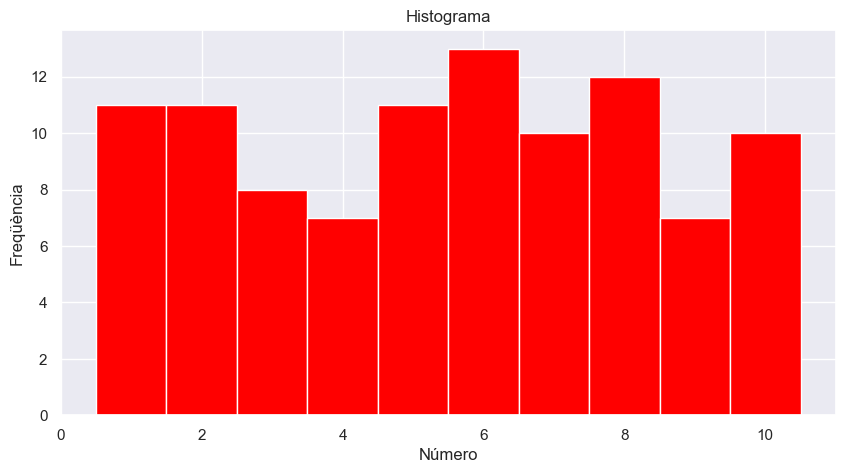

In [21]:
bins = list(d.keys())
values = list(d.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(bins, values, color ='red', width = 1)

plt.xlabel("Número")
plt.ylabel("Freqüència")
plt.title("Histograma")
plt.show()